In [1]:
import os
import stockdata as sd
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def plot(data, title):
    ax = data.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

In [3]:
    period = '3mo'
    data = sd.fetch_data(period)
    close = sd.get_close(data)
    sd.fill_gaps(close)

[*********************100%***********************]  6 of 6 completed


In [4]:
'''Typical values used:

Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)

Medium term: 20 day moving average, bands at 2 standard deviations.

Long term: 50 day moving average, bands at 2.5 standard deviations.

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands'''

'Typical values used:\n\nShort term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)\n\nMedium term: 20 day moving average, bands at 2 standard deviations.\n\nLong term: 50 day moving average, bands at 2.5 standard deviations.\n\nhttps://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands'

In [5]:
window = 10

In [6]:
eth = pd.DataFrame()

In [7]:
eth['Close'] = close['ETH-USD']
eth['MA'] = eth['Close'].rolling(window=window).mean()
eth['SD'] = eth['Close'].rolling(window=window).std()

In [8]:
n = 1.5

In [9]:
eth['+nSD'] = eth['MA'] + eth['SD'] * n
eth['-nSD'] = eth['MA'] - eth['SD'] * n

In [10]:
eth.drop(['SD'], axis=1, inplace=True)

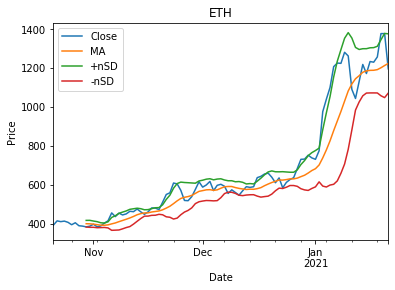

In [11]:
plot(eth, 'ETH')